
<p>Задание заключается в том, чтобы написать код, который требуется в ячейках ###ваш код здесь</p>


In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


<h3 id="Вероятности">Вероятности<a class="anchor-link" href="#Вероятности">¶</a></h3>



<p>Напоминаем формулу для вероятности события A: $$P(A) = \frac{N_A}{N}$$
Сгенерируем с помощью numpy.random.randint генератор подброса монетки. Функция randint генерирует случайное целое число в заданных пределах. Подробнее о том, как задать пределы можете почитать документацию.</p>


In [2]:
np.random.randint(2, size=10)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [3]:
def coin_flip():
    names = {0: "орёл", 1: "решка"}
    return names[np.random.randint(2)]

In [4]:
for _ in range(5):
    print(coin_flip())

решка
решка
решка
решка
орёл



<p>Можно также попробовать сделать вариант для игральных костей.</p>


In [5]:
def dice():
    return np.random.randint(6) + 1

In [6]:
for _ in range(5):
    print(dice())

3
4
3
6
4



<p>Математическое ожидание в дискретном случае: $$E(\xi) = \sum_{x}xP(\xi=x)$$
Здесь $x$ - это значения которые может принимать случайная величина $\xi$. В случае игральных костей - это 1,2,3,4,5,6. Для честных игральных костей вероятность выпадения каждого числа одинакова и равна $1/6$. Поэтому мат. ожидание равно: $$1/6 * 1 + 1/6 * 2 + ... 1/6 * 6 = 3.5$$</p>



<p>Если запустить кость много раз, то можно убедиться, что в среднем будет получаться мат. ожидание:</p>


In [7]:
results = [dice() for _ in range(10000)]
results

[2,
 5,
 2,
 4,
 5,
 2,
 5,
 6,
 4,
 2,
 2,
 4,
 2,
 5,
 5,
 1,
 6,
 6,
 1,
 4,
 4,
 4,
 4,
 3,
 2,
 3,
 5,
 1,
 1,
 5,
 3,
 2,
 1,
 3,
 3,
 4,
 2,
 2,
 3,
 5,
 2,
 6,
 5,
 3,
 1,
 1,
 2,
 2,
 1,
 3,
 4,
 6,
 1,
 4,
 5,
 6,
 2,
 2,
 3,
 1,
 3,
 5,
 6,
 6,
 3,
 6,
 5,
 5,
 2,
 3,
 6,
 1,
 5,
 6,
 3,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 5,
 5,
 2,
 1,
 3,
 1,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 5,
 5,
 3,
 6,
 6,
 6,
 4,
 4,
 5,
 5,
 6,
 3,
 4,
 2,
 5,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 4,
 6,
 6,
 1,
 6,
 4,
 2,
 3,
 4,
 1,
 6,
 2,
 6,
 5,
 4,
 6,
 3,
 5,
 2,
 6,
 5,
 1,
 2,
 1,
 3,
 1,
 5,
 6,
 3,
 4,
 5,
 3,
 5,
 1,
 4,
 3,
 3,
 1,
 4,
 2,
 6,
 3,
 5,
 5,
 6,
 2,
 2,
 4,
 5,
 6,
 2,
 6,
 4,
 3,
 5,
 2,
 1,
 6,
 5,
 5,
 2,
 5,
 2,
 5,
 4,
 4,
 3,
 3,
 2,
 2,
 6,
 3,
 6,
 3,
 2,
 2,
 2,
 4,
 4,
 3,
 5,
 4,
 3,
 6,
 6,
 2,
 4,
 1,
 6,
 6,
 2,
 5,
 5,
 3,
 1,
 5,
 3,
 1,
 3,
 4,
 1,
 5,
 1,
 4,
 3,
 4,
 1,
 2,
 5,
 5,
 1,
 5,
 3,
 2,
 1,
 6,
 3,
 2,
 2,
 2,
 3,
 2,
 6,
 1,
 6,


In [8]:
np.average(results)

3.4942


<p>Можно сделать нечестную кость, которая будет показывть какую-то грань чаще. Например, пусть выбрасывает грань "6" в два раза чаще чем остальные. Т.е. вероятность получения грани "6" равна $2/7$, а остальных $1/7$. Легче все это сделать с функцией np.random.choice, которая выбирает случайную выборку из переданного массива. Дополнительно с массивом туда можно передать массив вероятностей/весов.</p>


In [10]:
def unfair_sample(p):
    results = [1,2,3,4,5,6]
    return np.random.choice(results, p=p)

In [11]:
p = [1 / 7] * 5 + [2 / 7]
results = []
for _ in range(1000):
    results.append(unfair_sample(p))
for i, val in enumerate(np.bincount(results)[1:]):
    print(f'Значение {i} выпало {val} раз')

Значение 0 выпало 131 раз
Значение 1 выпало 136 раз
Значение 2 выпало 131 раз
Значение 3 выпало 158 раз
Значение 4 выпало 142 раз
Значение 5 выпало 302 раз


Её математическое ожидание равно:

In [12]:
sum((i + 1) * p[i] for i in range(6))

3.8571428571428568

А среднее значение выборки равно:

In [13]:
np.average(results)

3.95


<h3 id="Метод-максимального-правдоподобия">Метод максимального правдоподобия<a class="anchor-link" href="#Метод-максимального-правдоподобия">¶</a></h3><p>А теперь допустим, что мы не знаем какая из граней утяжелённая. Всё, что у нас есть - это 1000 бросков этой кости. Как понять, какую грань утяжелили? Можно применить метод максимального правдоподобия (далее ММП). В данном случае, это стрелять из пушки по воробьям, ведь можно просто посмотреть, какая грань чаще всего выпала. Но зато очень наглядно.</p>



<p>У нашего замысловатого распределения $p$ есть два параметра: та грань, которую утяжелили, и кол-во граней. Кол-во граней известно заранее, поэтому его трогать не будем. Назовём грань, которую утяжелили - $\theta$. По формуле получаем оценку максимального правдоподобия для этого параметра $\theta_{ОМП}$:
$$\theta_{ОМП}=argmax_\theta P(X|\theta)$$</p>



<p>$P(X|\theta)$ - вероятность нашей выборки при конкретном параметре $\theta$. Учитывая то, что все эксперименты были независимыми, то можно её расписать как произведение вероятностей: $$P(X|\theta)=\prod_{i=0}^{N-1}P(\xi=x_i|\theta)$$
$\xi$ - это случайная величина броска игральной кости, а $x_i$ - результаты i-го броска (в нашем случае это элементы массива results).</p>



<p>$P(\xi=x_i|\theta) = 2/7$, если $x_i=\theta$, и $1/7$ в других случаях. Переберите всевозможные параметры $\theta$, выведите все вероятности и найдите самую большую.</p>



<p>Совет: используйте не $P(X|\theta)$, а возьмите логарифм: $$log(P(X|\theta))=\sum_{i=0}^{N-1}log(P(\xi=x_i|\theta))$$ Т.к. при умножении большого кол-ва чисел меньше 1 результат будет очень маленьким, и компьютер выставит просто 0.</p>


In [14]:
thetas = [1,2,3,4,5,6]
for theta in thetas:
    ### ваш код здесь
    summ = 0.
    for val in results:
        summ += np.log(2 / 7 if val == theta else 1 / 7)
    print(theta, summ)

1 -1855.1078684019876
2 -1851.64213249919
3 -1855.107868401987
4 -1836.3928945268656
5 -1847.4832494158256
6 -1736.579700526222



<h3 id="Распределения">Распределения<a class="anchor-link" href="#Распределения">¶</a></h3>



<p>Рассмотрим более серьёзные примеры. Для начала рассмотрим непрерывные распределения: нормальное и пуассоновское.</p>



<p>Нормальное распределение можно сгенерировать с помощью функции np.random.normal(). loc - матожидание, scale - дисперсия. Нормальное распределение обычно описывает какие-то физические величины, которые подвержены большому числу случайных помех.</p>


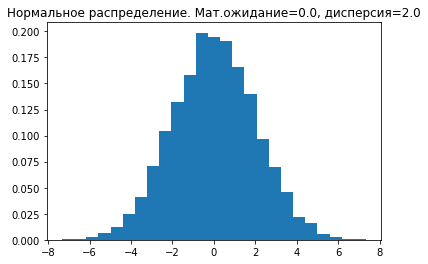

In [15]:
from scipy.stats import norm

num = 10000
loc = 0.
scale = 2.

# Выборка
data = np.random.normal(loc=loc, scale=scale, size=num)

# Рисуем гистограмму выборки
plt.hist(data, bins=25, density=True)
title = f"Нормальное распределение. Мат.ожидание={loc}, дисперсия={scale}"
plt.title(title)

plt.show()


<p>Распределение Пуассона, в отличие от нормального - дискретное, т.е. принимает только целые значения. Если какое-то событие происходит с определённой частотой и независимо друг от друга, то кол-во событий произошедших за определённый период подчиняется этому распределнию.</p>


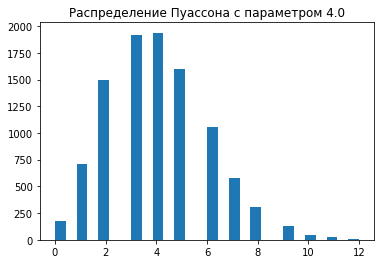

In [16]:
from scipy.stats import poisson

num = 10000
lam = 4.

# Выборка
data = np.random.poisson(lam=lam, size=num)

# Рисуем гистограмму выборки
plt.hist(data, bins=28)
title = f"Распределение Пуассона с параметром {lam}"
plt.title(title)

plt.show()


<p>Давайте загрузим реальные данные и попробуем с помощью этих ММП описать распределения.</p>



<p>Датасет описывает, сколько важных научных открытий было произведено в каждый год. Скорее всего, эти данные подходят для распределения Пуассона</p>


In [17]:
disc = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/discoveries.csv", index_col=0)
disc.head()

,time,value
1,1860,5
2,1861,3
3,1862,0
4,1863,2
5,1864,0


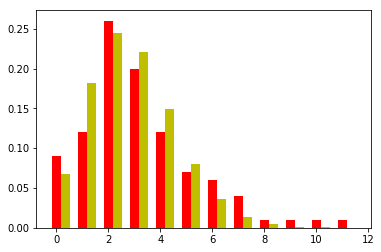

In [226]:
# Пакет для работы со статистикой
from scipy.stats import poisson

y = disc["value"]

# Строим гистограмму по нашим данным
hist, x = np.histogram(y, bins=y.max())
x = x[:-1]

# Нормализуем её
hist = hist / sum(hist)

# Ширина столбцов
width = 0.35
# Параметр распределения Пуассона
lam = 2.7

fig, ax = plt.subplots()
a1 = ax.bar(x, hist, width, color='r')
a2 = ax.bar(x + width, poisson.pmf(x, lam), width, color='y')
plt.show()


<p>Напишите код, как подобрать оптимальный параметр l с помощью ММП. Функция вероятность распределения Пауссона равна: 
$$ P(\xi=k|\lambda)=\frac{e^{-\lambda}\lambda^k}{k!}$$</p>


In [231]:
from math import factorial, fabs, log2

def my_poisson(k, lam):
    return np.exp(-lam) * lam ** k / factorial(k)

lams = np.arange(0., 4., 0.1)
ans_lam = 0
min_ds = 100000000
for lam in lams:
    ds = 1
    for i in range(len(x)):
        ds *= fabs(my_poisson(x[i], lam) - hist[i]) + 1
    if ds < min_ds:
        ans_lam = lam
        min_ds = ds
print(ans_lam)
    

2.5



<p>Если решать задачу аналитически, то оптимальная $\lambda$ равна среднему значению выборки.</p>



<h3 id="Теорема-Байеса.-Условные-вероятности.">Теорема Байеса. Условные вероятности.<a class="anchor-link" href="#Теорема-Байеса.-Условные-вероятности.">¶</a></h3><p>Теорема Байеса в простом случае: $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
В случае нескольких событий: $$P(A_j|B)=\frac{P(A_j)P(B|A_j)}{\sum_{i=1}^{N}P(A_i)P(B|A_i)}$$</p>



<p>Давайте посмотрим на условные распределения на реальных данных. Датасет для этой задачи будет из игры World of Warcraft. В ней есть "Поля боя" (Battlegrounds), на которой сражаются две фракции: Альянс(Alliance) и Орда(Horde). Каждую фракцию представляют игроки, которые могут быть различными классами (колонка Class). Битвы происходили несколько раз на разных полях боя, идентификатор одного боя - это колонка "Code".  В колонках Win, Lose показано, кто победил.</p>


In [217]:
data = pd.read_csv('wowbgs2.csv')
print(data.shape)
data.head()

(5383, 14)


,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN



<p>Колонка DD показывает, сколько персонаж нанёс урона. Колонка HD - сколько персонаж вылечил здоровья.</p>


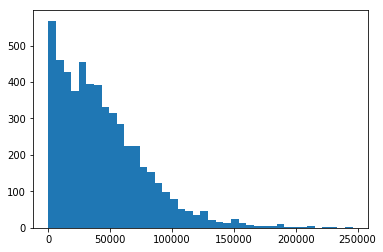

In [218]:
plt.hist(data["DD"], bins=40)
plt.show()


<p>Посмотрим, сколько урона наносит победившая команда, а сколько проигравшая. Т.е. насколько важен урон для победы.</p>


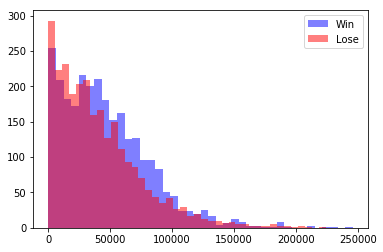

In [219]:
hist1, x = np.histogram(data[data.Win == 1.0]["DD"], bins=20)
hist2, x = np.histogram(data[data.Win != 1.0]["DD"], bins=20)
x = x[:-1]

width=0.35

plt.hist(data[data.Win == 1.0]["DD"], alpha=0.5, color='b', bins=40, label="Win")
plt.hist(data[data.Win != 1.0]["DD"], alpha=0.5, color='r', bins=40, label="Lose")
plt.legend()


<p>То же самое для лечения.</p>


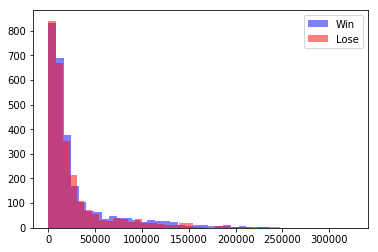

In [220]:
plt.hist(data[data.Win == 1.0]["HD"], alpha=0.5, color='b', bins=40, label="Win")
plt.hist(data[data.Win != 1.0]["HD"], alpha=0.5, color='r', bins=40, label="Lose")
plt.legend()


<p>Можно определить разброс по урону у каждого класса. Выберем только классы у которых роль - нанесение урона (колонка Rol, значение dps).</p>


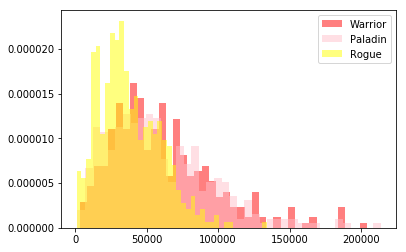

In [221]:
dps = data[data.Rol == 'dps']
plt.hist(dps[dps.Class == "Death Knight"]["DD"], alpha=0.5, color='red', bins=40, label="Warrior", density=True)
plt.hist(dps[dps.Class == "Paladin"]["DD"], alpha=0.5, color='pink', bins=40, label="Paladin", density=True)
plt.hist(dps[dps.Class == "Rogue"]["DD"], alpha=0.5, color='yellow', bins=40, label="Rogue", density=True)
plt.legend()


<h4 id="Задание:">Задание:<a class="anchor-link" href="#Задание:">¶</a></h4><p>На вход подаётся несколько значений урона для какого-то персонажа. Ваша задача с помощью теорема Байеса определить, к кому, скорее всего, принадлежат данные цифры.</p>
<ol>
<li>В данном случае $A_j$ - это класс игрока, а $B$ - его урон. Вам нужно найти $P(A_j|B)$</li>
<li>Когда будете считать $P(B|A_j)$ можете просто пройтись по датасету и найти кол-во всех значений, которые лежат на интервале (B - 1000, B + 1000)</li>
</ol>


In [224]:

### ваш код здесь

#генерит p(b)p(b|ai)
def gen_prob(dd, Class):
    cnt_dd = 0
    cnt_all_dd = 0
    for cdd, jClass in zip(data['DD'], data['Class']):
        if abs(cdd - dd) <= 1000:
            cnt_all_dd += 1
            if jClass == Class:
                cnt_dd += 1
    pbai = cnt_dd / len(data['DD'])   #p(b|ai)
    pb = cnt_all_dd / len(data['DD']) #p(b)
    #print(pb)
    return pbai * pb

def predict_class(dd):
    classes = np.array(list(set(data['Class'])))
    ans = 0
    ans_val = 0
    i = 0
    for Class in classes:
        up = gen_prob(dd, Class)
        down = 0
        for jClass in classes:
            down += gen_prob(dd, jClass)
        cur = 0
        try:
            cur = up / down
        except ZeroDivisionError:
            cur = up
        print(classes[i], cur)
        if cur >= ans:
            ans = cur
            ans_val = i
        i += 1
    return classes[ans_val]

predict_class(40000)

Warlock 0.09923664122137404
Mage 0.11450381679389313
Shaman 0.061068702290076333
Paladin 0.061068702290076333
Demon Hunter 0.04580152671755725
Druid 0.09923664122137404
Rogue 0.11450381679389313
Warrior 0.11450381679389313
Monk 0.022900763358778626
Hunter 0.1297709923664122
Death Knight 0.08396946564885496
Priest 0.05343511450381679


'Hunter'


<h3 id="Наивный-Байес">Наивный Байес<a class="anchor-link" href="#Наивный-Байес">¶</a></h3>



<p>Пусть у нас есть обучающая выборка $X=(x_1,...x_N)$, каждый объект имеет $m$ признаков $w_1,...w_m$. И пусть мы решаем задачу классификации, т.е. в качестве ответа у нас есть $c$ классов. Наивный байесовский классификатор решает задачу следующим образом:
$$classify(w_1,...,w_n) = argmax_c\{P(c)\prod_{i=1}^{m}P(w_i|c)\}$$</p>



<p>Датасет для этой задачи будет из игры World of Warcraft. В ней есть "Поля боя" (Battlegrounds), на которой сражаются две фракции: Альянс(Alliance) и Орда(Horde). Каждую фракцию представляют игроки, которые могут быть различными классами (колонка Class). Битвы происходили несколько раз на разных полях боя, идентификатор одного боя - это колонка "Code".  В колонках Win, Lose показано, кто победил.</p>



<p>Допустим, начинается битва. Мы знаем, кто в нашей команде. Наша цель, понять, кто победит. В качестве признаков мы будем использовать кол-во каждого класса в каждой из команд. Я модифицировал датасет для этой задачи. Каждая строка - это отдельная битва. Колонки - это кол-во классов за каждую из фракций. target: 1 - победила Орда, 0 - победил Альянс</p>


In [199]:
df = pd.read_csv("wow_win_lose.csv", index_col=0)
df.head()

,Hunter_Horde,Hunter_Alliance,Death Knight_Horde,Death Knight_Alliance,Paladin_Horde,Paladin_Alliance,Rogue_Horde,Rogue_Alliance,Druid_Horde,Druid_Alliance,...,Demon Hunter_Alliance,Warlock_Horde,Warlock_Alliance,Warrior_Horde,Warrior_Alliance,Monk_Horde,Monk_Alliance,Mage_Horde,Mage_Alliance,target
index,,,,,,,,,,,,,,,,,,,,,
WG1,1,0,1,0,1,2,0,2,2,1,...,1,0,2,1,0,0,0,0,0,1
WG2,0,0,2,2,1,0,0,1,1,0,...,1,1,1,1,2,0,2,0,0,0
WG3,0,3,0,0,1,1,1,1,2,1,...,1,0,0,0,0,0,0,1,0,0
WG4,0,1,0,0,0,0,1,1,0,0,...,2,2,0,2,2,1,2,1,1,0
WG5,2,0,0,0,0,2,1,3,0,1,...,1,2,0,0,1,2,0,0,1,0


In [201]:
df["target"].value_counts()

1    155
0     94
Name: target, dtype: int64


<p>Большая часть классификатора написана. Нужно написать функцию predict.</p>


In [248]:
class NaiveBaies():    
    def fit(self, X, y):
        # Список классов
        self.classes = np.unique(y)
        # Сохраним кол-во классов
        self.cls_counts = np.bincount(y)
        
        # Сохраним для каждого значения признака кол-во таких объектов (P(w_i|c)), чтобы потом было легче обучаться
        # self.feature_counts[cls][column_idx][i] - 1+ кол-во элементов в обучающей выборке, с классом cls, у которых
        # признак под номером column_idx равен i
        self.feature_counts = {}
        for cls in self.classes:
            cur_feature_counts = {}
            for j in range(X.shape[1]):
                # Добавим ко всем значениям единицу, чтобы не было нулей в вероятностях
                cur_feature_counts[j] = np.bincount(X[y == cls, j], minlength=10) + 1
            self.feature_counts[cls] = cur_feature_counts
        return self
        
    def predict(self, X_test):
        preds = []
        for rw in X_test:
            ans_cls = 0
            ans_prob = 0
            for i, cls in enumerate(self.classes):
                prob = self.cls_counts[i] / sum(self.cls_counts)
                for j, w in enumerate(rw):
                    prob *= self.feature_counts[cls][j][w]
                if prob > ans_prob:
                    ans_cls = cls
                    ans_prob = prob
            preds.append(ans_cls)
        return preds

In [249]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=4, random_state=42, shuffle=True)

for train, test in kf.split(df):
    df_train = df.iloc[train]
    df_test = df.iloc[test]
    
    X_train, y_train = df_train.drop("target", axis=1).values, df_train["target"].values
    X_test, y_test = df_test.drop("target", axis=1).values, df_test["target"].values

    clf = NaiveBaies()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(accuracy_score(preds, y_test))    

0.5238095238095238
0.6451612903225806
0.6935483870967742
0.6290322580645161



<p>Можно попробовать и логистическую регрессию.</p>


In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cross_val_score(LogisticRegression(), df.drop("target", axis=1).values, df["target"].values, scoring="accuracy", cv=4)

array([0.61904762, 0.68253968, 0.61290323, 0.62295082])